In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy import interpolate
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

In [2]:
# MCEq table paths — change to your respective location

file_name_2d = 'flux_tables_DPMJET_2D.npy'
file_name_1d = 'flux_tables_DPMJET_1D.npy'

In [112]:
# Load the tables

pdg_numu = 14 #(14:NuMu, -14: NuMuBar, 12:NuE, -12: NuEBar)
numu_tables_2d = np.load(file_name_2d, allow_pickle=True).item()[pdg_numu]
#tables_1d = np.load(file_name_1d, allow_pickle=True).item()[pdg]

pdg_numubar = -14
numubar_tables_2d = np.load(file_name_2d, allow_pickle=True).item()[pdg_numubar]

pdg_nue = 12
nue_tables_2d = np.load(file_name_2d, allow_pickle=True).item()[pdg_nue]

pdg_nuebar = -12
nuebar_tables_2d = np.load(file_name_2d, allow_pickle=True).item()[pdg_nuebar]

# The columns of the table files are: cos_zen, log10(energy), flux

In [113]:
numu_tables_1d = np.load(file_name_1d, allow_pickle=True).item()[pdg_numu]
numubar_tables_1d = np.load(file_name_1d, allow_pickle=True).item()[pdg_numubar]
nue_tables_1d = np.load(file_name_1d, allow_pickle=True).item()[pdg_nue]
nuebar_tables_1d = np.load(file_name_1d, allow_pickle=True).item()[pdg_nuebar]

In [114]:
coszen_range = np.linspace(-1, 1, 51)
lgE_range = np.arange(-0.05, 2.15, 0.1)
lgE_range

array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95,  1.05,  1.15,  1.25,  1.35,  1.45,  1.55,  1.65,
        1.75,  1.85,  1.95,  2.05])

In [115]:
interpolator_2d = RegularGridInterpolator((lgE_range, coszen_range), 
                                          tables_2d[:, 2].reshape(-1, len(coszen_range)))

interpolator_1d = RegularGridInterpolator((lgE_range, coszen_range), 
                                          tables_1d[:, 2].reshape(-1, len(coszen_range)))

Text(0.5, 1.0, '$E = 1.12\\,\\mathrm{GeV}$')

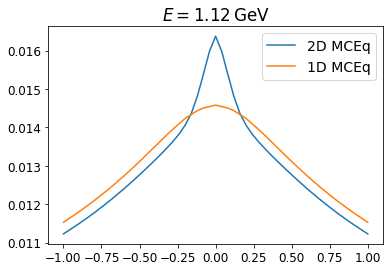

In [116]:
# Plot the coszen distributions for one energy
lgE = 0.05

plt.plot(coszen_range, interpolator_2d((lgE, coszen_range)), label='2D MCEq')
plt.plot(coszen_range, interpolator_1d((lgE, coszen_range)), label='1D MCEq')

plt.legend(loc='upper right')
plt.title('$E = %s\,\mathrm{GeV}$'%np.round(10**lgE, 2))

Text(0.5, 1.0, '$E = 89.13\\,\\mathrm{GeV}$')

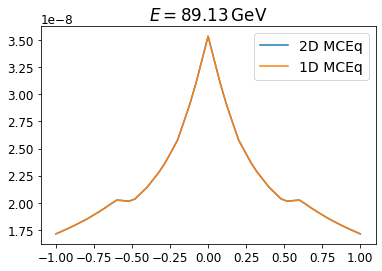

In [117]:
lgE = 1.95

plt.plot(coszen_range, interpolator_2d((lgE, coszen_range)), label='2D MCEq')
plt.plot(coszen_range, interpolator_1d((lgE, coszen_range)), label='1D MCEq')

plt.legend(loc='upper right')
plt.title('$E = %s\,\mathrm{GeV}$'%np.round(10**lgE, 2))

In [118]:
costheta_all = numu_tables_2d[:,0]
energies_all = numu_tables_2d[:,1]

fluxes_numu = numu_tables_2d[:,2]
flux_matrix_numu = fluxes_numu.reshape((22, 51)).T *10_000    # from cm^-2 to m^-2
flux_matrix_cropped_numu = flux_matrix_numu[:,1:-1]

fluxes_numubar = numubar_tables_2d[:,2]
flux_matrix_numubar = fluxes_numubar.reshape((22, 51)).T *10_000 
flux_matrix_cropped_numubar = flux_matrix_numubar[:,1:-1]

fluxes_nue = nue_tables_2d[:,2]
flux_matrix_nue = fluxes_nue.reshape((22, 51)).T *10_000 
flux_matrix_cropped_nue = flux_matrix_nue[:,1:-1]

fluxes_nuebar = nuebar_tables_2d[:,2]
flux_matrix_nuebar = fluxes_nuebar.reshape((22, 51)).T *10_000 
flux_matrix_cropped_nuebar = flux_matrix_nuebar[:,1:-1]


energies = 10**energies_all[::51]
energy_cropped = energies[1:-1]
costheta = costheta_all[:51]

In [119]:
fluxes_numu1D = numu_tables_1d[:,2]
flux_matrix_numu1D = fluxes_numu1D.reshape((22, 51)).T *10_000    # from cm^-2 to m^-2
flux_matrix_cropped_numu1D = flux_matrix_numu1D[:,1:-1]

fluxes_numubar1D = numubar_tables_1d[:,2]
flux_matrix_numubar1D = fluxes_numubar1D.reshape((22, 51)).T *10_000 
flux_matrix_cropped_numubar1D = flux_matrix_numubar1D[:,1:-1]

fluxes_nue1D = nue_tables_1d[:,2]
flux_matrix_nue1D = fluxes_nue1D.reshape((22, 51)).T *10_000 
flux_matrix_cropped_nue1D = flux_matrix_nue1D[:,1:-1]

fluxes_nuebar1D = nuebar_tables_1d[:,2]
flux_matrix_nuebar1D = fluxes_nuebar1D.reshape((22, 51)).T *10_000 
flux_matrix_cropped_nuebar1D = flux_matrix_nuebar1D[:,1:-1]

In [232]:
MCEq1d_numu_test = np.genfromtxt('MCEq1d_numu_test', delimiter=',')
MCEq1d_numu_test.shape

(30, 22)

In [79]:
# energy intervals
energy_min = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins = np.digitize(energy_cropped, energy_min)
energy_binwidths = energy_max - energy_min

xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min, energy_max[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

In [ ]:
# Binning

In [80]:
x_interp_energy = np.linspace(energy_min[0], energy_max[-1], 10000)
x_interp_theta = np.linspace(-1, 1, 10000)

energy_bins_spline = np.digitize(x_interp_energy, energy_min)
energy_bin_center = (energy_max + energy_min) / 2

cos_bins = np.arange(-1, 1, 0.1)
cos_bins_spline = np.digitize(x_interp_theta, cos_bins)

In [236]:
def bin_matrix(matrix, MCEq = True, energy=energies, costheta=costheta):
    dimy = 20
    dimx = 10

    matrix_ybinned = np.zeros((dimy , len(matrix[0])))
    binned_matrix = np.zeros((dimy, dimx))
    
    if MCEq:
        for e in range(len(matrix[0])):
            y_interp_theta = interpolate.pchip_interpolate(costheta, matrix[:,e], x_interp_theta)
            avg = np.zeros(dimy)

            for i in range(1, dimy+1):
                x_integrate = x_interp_theta[cos_bins_spline == i]
                y_integrate = y_interp_theta[cos_bins_spline == i]
                integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=- 1)
                avg[i-1] = integral / 0.1

            matrix_ybinned[:,e] = avg
            
    else:
        matrix_ybinned = matrix.copy()


    for theta in range(dimy):
        y_interp_energy = interpolate.pchip_interpolate(energy, matrix_ybinned[theta], x_interp_energy)
        avg = np.zeros(dimx)

        for i in range(1, dimx+1):
            x_integrate = x_interp_energy[energy_bins_spline == i]
            y_integrate = y_interp_energy[energy_bins_spline == i]
            integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=- 1)
            avg[i-1] = integral / energy_binwidths[i-1]

        binned_matrix[theta] = avg
    
    return binned_matrix

In [191]:
numu_binned_1d = bin_matrix(flux_matrix_numu1D)
numubar_binned_1d = bin_matrix(flux_matrix_numubar1D)
nue_binned_1d = bin_matrix(flux_matrix_nue1D)
nuebar_binned_1d = bin_matrix(flux_matrix_nuebar1D)

In [192]:
numu_binned_2d = bin_matrix(flux_matrix_numu)
numubar_binned_2d = bin_matrix(flux_matrix_numubar)
nue_binned_2d = bin_matrix(flux_matrix_nue)
nuebar_binned_2d = bin_matrix(flux_matrix_nuebar)

In [237]:
costheta1d = np.linspace(-1,1,60)
energy1d = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\MCEq_energy_spline')

test_1d_binned = bin_matrix(np.concatenate((np.flip(MCEq1d_numu_test, axis=0), MCEq1d_numu_test)), costheta=costheta1d)


In [243]:
np.savetxt('test_1d_binned', test_1d_binned, delimiter=',')

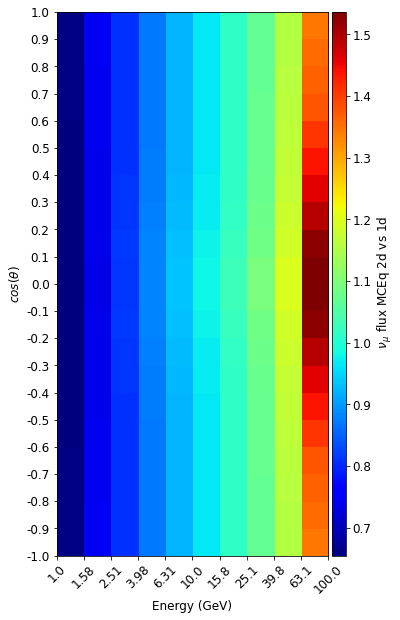

In [259]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(test_1d_binned/numu_binned_1d, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta)$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' $\nu_{\mu}$ flux MCEq 2d vs 1d', fontsize=12)

In [129]:
np.savetxt('MCEq2D_numu_flux', numu_binned_2d, delimiter=',')
np.savetxt('MCEq2D_numubar_flux', numubar_binned_2d, delimiter=',')
np.savetxt('MCEq2D_nue_flux', nue_binned_2d, delimiter=',')
np.savetxt('MCEq2D_nuebar_flux', nuebar_binned_2d, delimiter=',')
np.savetxt('MCEq1D_numu_flux', numu_binned_1d, delimiter=',')
np.savetxt('MCEq1D_numubar_flux', numubar_binned_1d, delimiter=',')
np.savetxt('MCEq1D_nue_flux', nue_binned_1d, delimiter=',')
np.savetxt('MCEq1D_nuebar_flux', nuebar_binned_1d, delimiter=',')

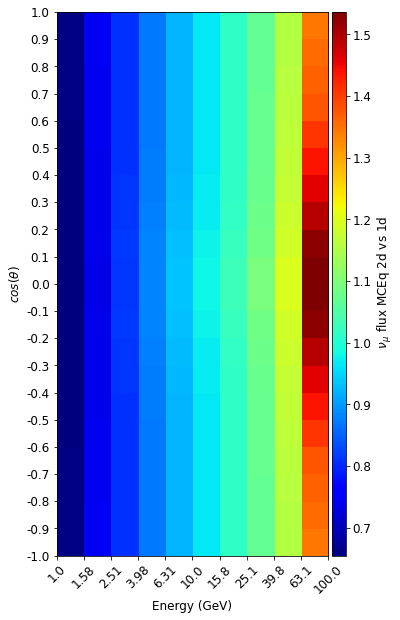

In [239]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(test_1d_binned/numu_binned_1d, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta)$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' $\nu_{\mu}$ flux MCEq 2d vs 1d', fontsize=12)
#fig.savefig('MCEq_binned_flux_spline');

In [95]:
# Rates

In [256]:
def rates(matrix, years=1):    
    rate = matrix.copy()
        
    # Multiply by sr
    rate *= 4*np.pi/20

    rate_year = rate * 31_556_926*years    # seconds in a year
    
    # Multiply by energy binwidth
    for i in range(len(rate_year[0])):
        rate_year[:, i] *= energy_binwidths[i]

        
    return rate_year

In [257]:
rate2d_numu_10yr = rates(numu_binned_2d, years=10)
rate2d_numubar_10yr = rates(numubar_binned_2d, years=10)
rate2d_nue_10yr = rates(nue_binned_2d, years=10)
rate2d_nuebar_10yr = rates(nuebar_binned_2d, years=10)
rate1d_numu_10yr = rates(numu_binned_1d, years=10)
rate1d_numubar_10yr = rates(numubar_binned_1d, years=10)
rate1d_nue_10yr = rates(nue_binned_1d, years=10)
rate1d_nuebar_10yr = rates(nuebar_binned_1d, years=10)

In [258]:
np.savetxt('MCEq2D_numu_rate10', rate2d_numu_10yr, delimiter=',')
np.savetxt('MCEq2D_numubar_rate10', rate2d_numubar_10yr, delimiter=',')
np.savetxt('MCEq2D_nue_rate10', rate2d_nue_10yr, delimiter=',')
np.savetxt('MCEq2D_nuebar_rate10', rate2d_nuebar_10yr, delimiter=',')
np.savetxt('MCEq1D_numu_rate10_new', rate1d_numu_10yr, delimiter=',')
np.savetxt('MCEq1D_numubar_rate10_new', rate1d_numubar_10yr, delimiter=',')
np.savetxt('MCEq1D_nue_rate10_new', rate1d_nue_10yr, delimiter=',')
np.savetxt('MCEq1D_nuebar_rate10_new', rate1d_nuebar_10yr, delimiter=',')

### Flux plots

In [134]:
Honda_numu_flux = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\Honda_numu_flux', delimiter=',');

C:\Users\Bruger\Anaconda3\envs\MCEq_env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


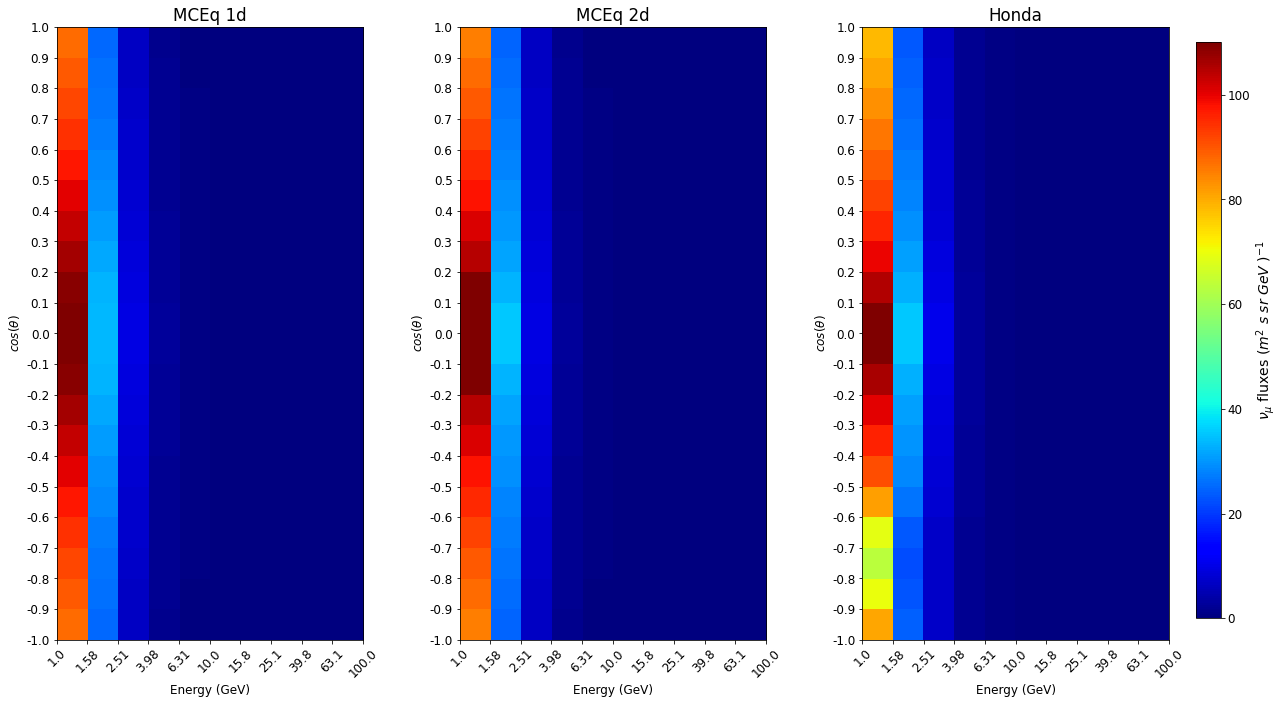

In [241]:
fluxes = [numu_binned_1d, numu_binned_2d, Honda_numu_flux]
labels = ['MCEq 1d', 'MCEq 2d', 'Honda']

fig, ax = plt.subplots(1, 3, figsize=(17,10))
ax.ravel()

for i in range(3):
    im = ax[i].imshow(fluxes[i], cmap='jet', vmin=0, vmax=110) 
    ax[i].set_xlabel('Energy (GeV)')
    ax[i].set_ylabel(r'$cos(\theta)$')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation=45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels)
    ax[i].set_title(labels[i])
    
cbar_ax = fig.add_axes([0.99, 0.13, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\nu_{\mu}$ fluxes ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=14)
fig.tight_layout()
fig.savefig('Fluxes 3 models', dpi=300, bbox_inches = "tight")

### Ratio plots

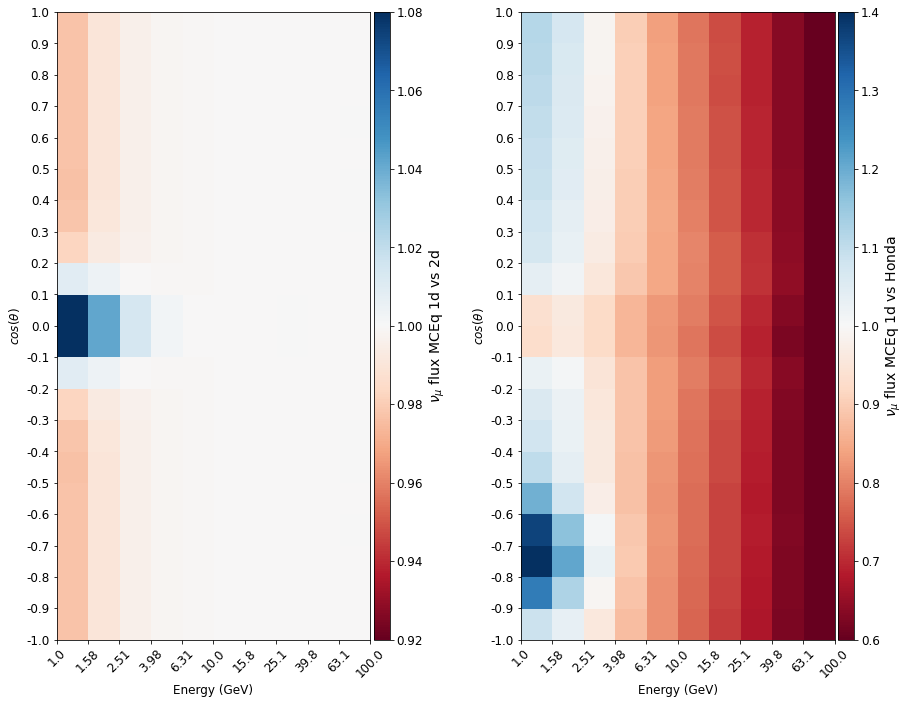

In [276]:
ratios = [numu_binned_2d/numu_binned_1d, numu_binned_1d/Honda_numu_flux]
labels_ratios = [r'$\nu_{\mu}$ flux MCEq 1d vs 2d', r'$\nu_{\mu}$ flux MCEq 1d vs Honda']

fig, ax = plt.subplots(1, 2, figsize=(13,10))
ax.ravel()

im = [ax[0].imshow(ratios[0], cmap='RdBu', vmin=0.92, vmax=1.08), ax[1].imshow(ratios[1], cmap='RdBu', vmin=0.6, vmax=1.4)] 

for i in range(2):
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im[i], cax=cax)
    cbar.set_label(labels_ratios[i], fontsize=14)
    ax[i].set_xlabel('Energy (GeV)')
    ax[i].set_ylabel(r'$cos(\theta)$')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation=45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels);
    
fig.tight_layout()
fig.savefig('ratio plots')

In [196]:
Honda_numu_cropped = np.genfromtxt('Honda_numu_cropped', delimiter=',')
Honda_energy_cropped = np.genfromtxt('Honda_energy_cropped', delimiter=',')

In [249]:
Honda_numu_binned = bin_matrix(Honda_numu_cropped, MCEq=False, energy=Honda_energy_cropped)
Honda_numu_rate = rates()

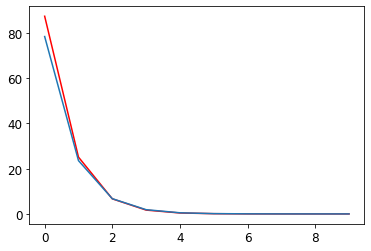

In [274]:
plt.plot(numu_binned_1d[0], 'r-')
plt.plot(Honda_numu_flux[0])

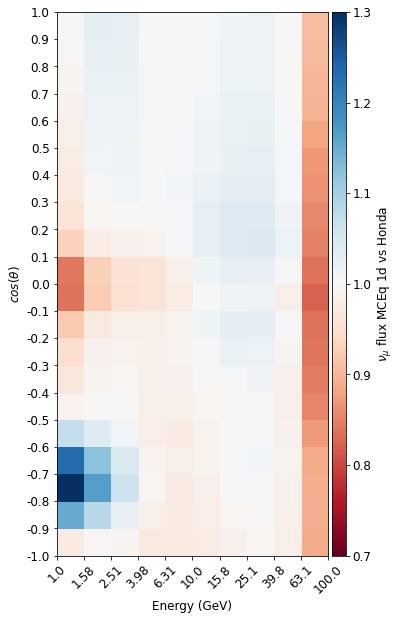

In [281]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(numu_binned_1d/Honda_numu_flux*energy_binwidths**0.152 *0.976, cmap='RdBu', vmin=0.7, vmax=1.3) 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta)$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label( r'$\nu_{\mu}$ flux MCEq 1d vs Honda', fontsize=12)